## import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

C:\Users\amras\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Load Data

In [3]:
data = pd.read_csv('E:\Machine Learning\suicide\master.csv')

In [4]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## EDA

In [5]:
data.dropna(inplace=True)

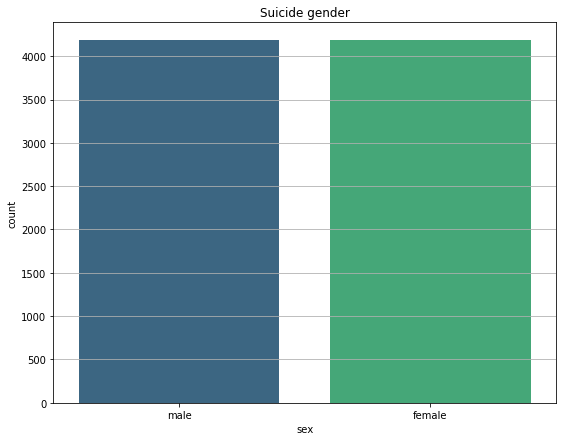

In [6]:
plt.figure(figsize=(9, 7))
plt.title('Suicide gender')
plt.grid()
sns.countplot(x='sex', data=data, palette='viridis')
plt.show()

In [7]:
data['sex'].value_counts()

female    4182
male      4182
Name: sex, dtype: int64

In [8]:
data['age'].value_counts()

15-24 years    1394
55-74 years    1394
5-14 years     1394
75+ years      1394
35-54 years    1394
25-34 years    1394
Name: age, dtype: int64

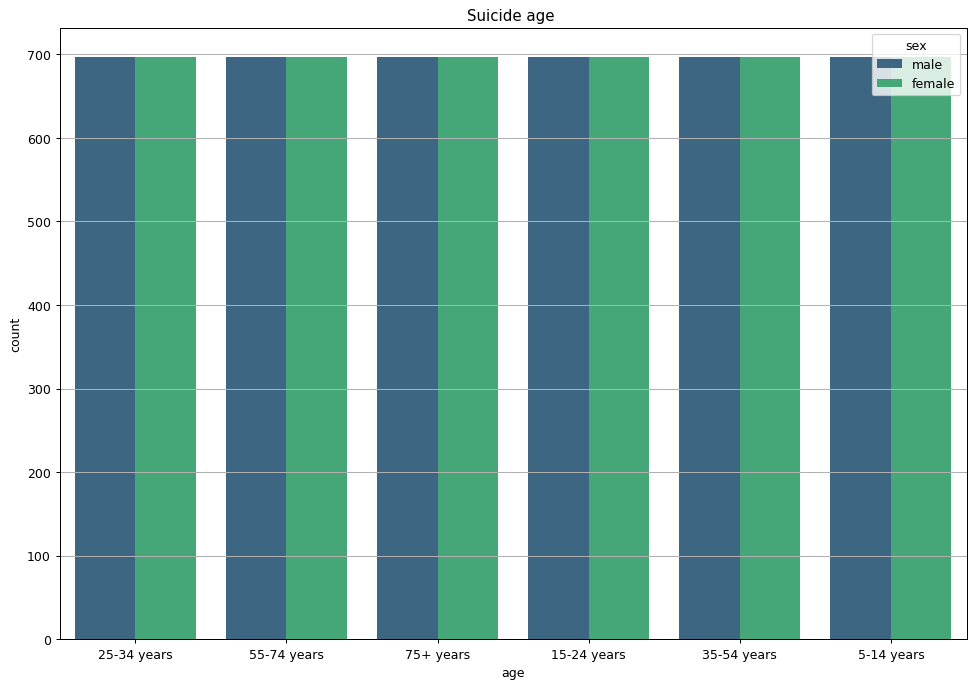

In [9]:
plt.figure(figsize=(13, 9), dpi=90)
plt.title('Suicide age ')
plt.grid()
sns.countplot(x='age', hue='sex', data=data, palette='viridis')
plt.show()

## Histogram Suicide Year

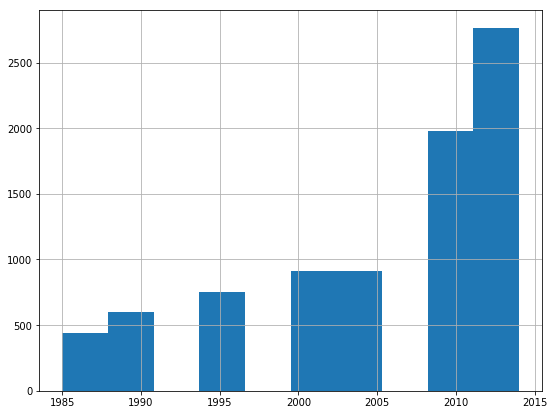

In [10]:
plt.figure(figsize=(9, 7))
plt.grid()
data['year'].hist()
plt.show()

## Generation Suicide

In [11]:
data['generation'].value_counts()

Generation X       2014
Millenials         1994
Silent             1714
Boomers            1226
Generation Z        790
G.I. Generation     626
Name: generation, dtype: int64

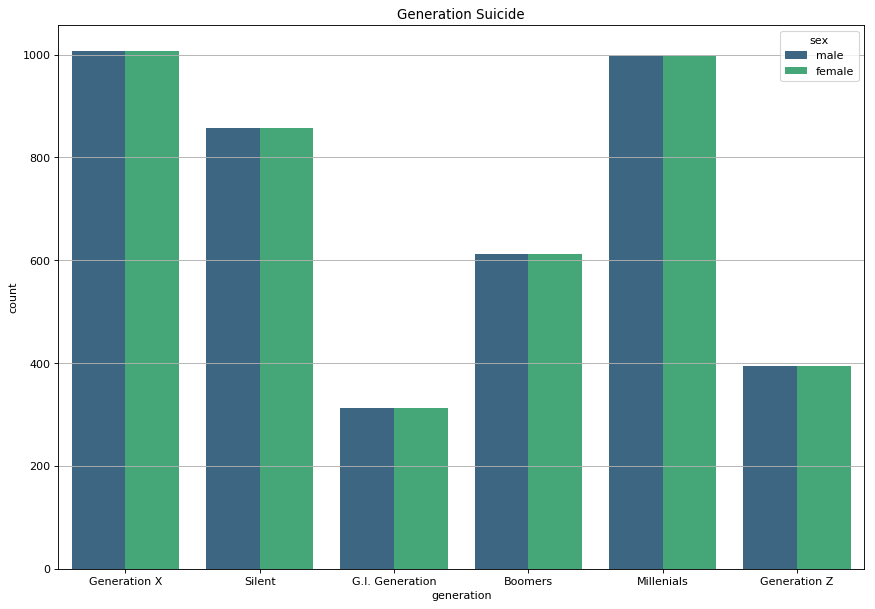

In [12]:
plt.figure(figsize=(13, 9), dpi=80)
plt.title('Generation Suicide')
plt.grid()
sns.countplot(x='generation',hue='sex', data=data, palette='viridis')
plt.show()

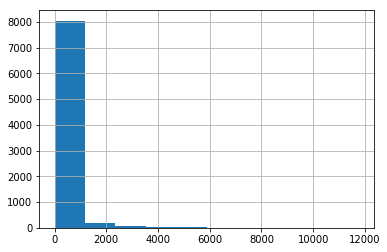

In [13]:
data['suicides_no'].hist()

In [14]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X


In [15]:
x = data['country']
y = data['HDI for year']
z = data['year']

In [16]:
df = pd.concat([x,y,z],axis=1)

In [17]:
df.head()

,country,HDI for year,year
72,Albania,0.619,1995
73,Albania,0.619,1995
74,Albania,0.619,1995
75,Albania,0.619,1995
76,Albania,0.619,1995


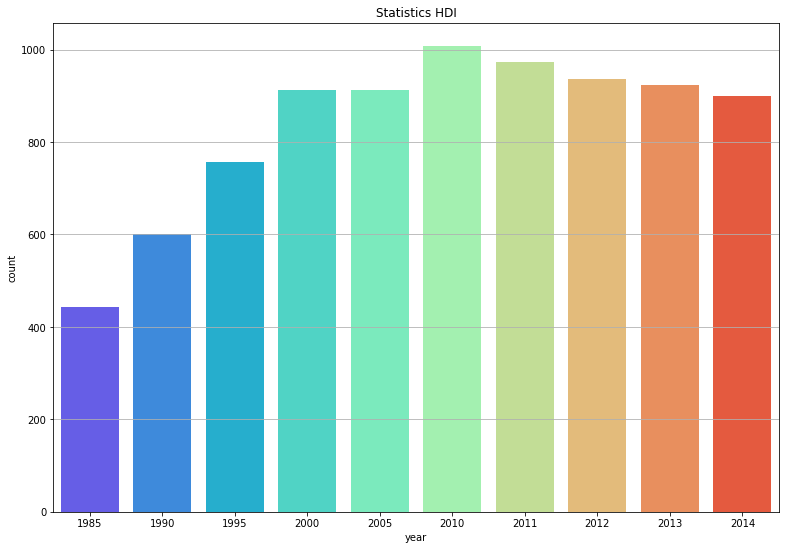

In [18]:
plt.figure(figsize=(13, 9))
plt.title('Statistics HDI')
plt.grid()
sns.countplot(x='year', data=df, palette='rainbow')

In [19]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X


## Preprocessing

In [20]:
data.drop(['country','country-year','gdp_per_capita ($)',' gdp_for_year ($) '], axis=1,inplace=True)

In [21]:
data.head()

,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,generation
72,1995,male,25-34 years,13,232900,5.58,0.619,Generation X
73,1995,male,55-74 years,9,178000,5.06,0.619,Silent
74,1995,female,75+ years,2,40800,4.90,0.619,G.I. Generation
75,1995,female,15-24 years,13,283500,4.59,0.619,Generation X
76,1995,male,15-24 years,11,241200,4.56,0.619,Generation X


In [22]:
data.generation.value_counts()

Generation X       2014
Millenials         1994
Silent             1714
Boomers            1226
Generation Z        790
G.I. Generation     626
Name: generation, dtype: int64

## Convert generation to Binary

In [23]:
def convert(x):
    """
    Generation X       0
    Millenials         1
    Silent             2
    Boomers            3
    Generation Z       4
    G.I. Generation    5

    """
    if x == 'Generation X':
        return 0 
    elif x == 'Millenials':
        return 1
    elif x == 'Silent':
        return 2
    elif x == 'Boomers':
        return 3
    elif x == 'Generation Z':
        return 4
    elif x == 'G.I. Generation':
        return 5

In [24]:
data['generation'] = data['generation'].apply(convert)

In [25]:
data['generation'].value_counts()

0    2014
1    1994
2    1714
3    1226
4     790
5     626
Name: generation, dtype: int64

In [26]:
data.head()

,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,generation
72,1995,male,25-34 years,13,232900,5.58,0.619,0
73,1995,male,55-74 years,9,178000,5.06,0.619,2
74,1995,female,75+ years,2,40800,4.90,0.619,5
75,1995,female,15-24 years,13,283500,4.59,0.619,0
76,1995,male,15-24 years,11,241200,4.56,0.619,0


## Convert gender to Binary

In [27]:
from sklearn.preprocessing import LabelBinarizer

In [28]:
lb = LabelBinarizer()

In [29]:
data['sex'] = lb.fit_transform(data['sex'])

In [30]:
data['sex'].value_counts()

1    4182
0    4182
Name: sex, dtype: int64

In [ ]:
def convert_age(x):
    if x == '15-24 years':
        return 2

In [36]:
data['age'].value_counts()

15-24 years    1394
55-74 years    1394
5-14 years     1394
75+ years      1394
35-54 years    1394
25-34 years    1394
Name: age, dtype: int64

In [31]:
data.head()

,year,sex,age,suicides_no,population,suicides/100k pop,HDI for year,generation
72,1995,1,25-34 years,13,232900,5.58,0.619,0
73,1995,1,55-74 years,9,178000,5.06,0.619,2
74,1995,0,75+ years,2,40800,4.90,0.619,5
75,1995,0,15-24 years,13,283500,4.59,0.619,0
76,1995,1,15-24 years,11,241200,4.56,0.619,0


## Scale Data

In [37]:
x = data[['year', 'suicides_no', 'population', 'suicides/100k pop',
       'HDI for year', 'generation']].values
y = data[['sex']]

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

In [40]:
x = sc.fit_transform(x)

## Train Test Split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.33)

## Create Model

In [42]:
model = LogisticRegression()

In [43]:
model.fit(x_train, y_train)

C:\Users\amras\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [44]:
y_pred = model.predict(x_test)

In [51]:
print('Confusion Matrix :\n')
print(confusion_matrix(y_test, y_pred))
print()
print('Classification Report :\n')
print(classification_report(y_test, y_pred))
print('Accuracy :{0:.2f}'.format(accuracy_score(y_test, y_pred)))

Confusion Matrix :

[[1171  201]
 [ 531  858]]

Classification Report :

             precision    recall  f1-score   support

          0       0.69      0.85      0.76      1372
          1       0.81      0.62      0.70      1389

avg / total       0.75      0.73      0.73      2761

Accuracy :0.73
